*Hypothesis and Analytical Approach*

Since the change in government, Argentina has undergone a significant shift in its import policy. Many previous restrictions—both on the type of items allowed and on foreign currency payments—have been lifted. As a result, importing goods has become much easier and more accessible for both individuals and companies. One key factor contributing to this trend is the "courier regime," which allows for tax-free imports under USD 400, making it considerably cheaper to purchase directly from abroad than through local resellers.

To evaluate the impact of these changes, we analyzed a dataset from Argentine Customs covering the period from January 2024 to April 2025. This dataset includes detailed information on:

Product categories (classified by Harmonized Tariff Schedule - HTS codes),

Quantities imported,

Declared values (FOB), and

Customs entry points.

This analysis aims to identify which products are being imported the most and where these goods are entering the country. Understanding these trends can offer insight into consumer behavior, the effectiveness of the new import policies, and emerging business opportunities.

Our main focus will be on the most-imported product, in order to create a narrative that resonates with the general public—especially those who may recognize themselves as part of this growing trend of international online shoppers.

In [1]:
#first, we need import all neccesary apps
import pandas as pd

In [2]:
#import specific sheet name from excel file 
df = pd.read_excel('courier.xlsx', sheet_name='EX_2025_00980818_COUR_IMPO')

In [3]:
#check import
df.head(10)

,FECHA_MES,ADUANA,ESTADO,POSICION,FOB_ENVIOS,TIPO_UNIDAD,DESC_TIPO_UNIDAD,CANT_UNIDAD
0,2024-11,73,CAN,3824.99.,1,14,GRAMO,1800
1,2024-10,73,CAN,7018.20.,1,68,GRAMO BASE,1500
2,2025-04,73,CAN,3906.90.,1,14,GRAMO,1500
3,2024-09,73,CAN,9606.30.,1,7,UNIDAD,1000
4,2024-09,73,PRE,2528.00.,1,14,GRAMO,1000
5,2024-05,73,PRE,3906.90.,1,68,GRAMO BASE,900
6,2024-11,73,CAN,3824.81.,1,68,GRAMO BASE,900
7,2025-01,73,CAN,3811.21.,1,68,GRAMO BASE,900
8,2025-03,73,CAN,3802.10.,1,68,GRAMO BASE,900
9,2025-04,73,CAN,5903.20.,1,68,GRAMO BASE,900


In [4]:
df.dtypes

FECHA_MES           object
ADUANA              object
ESTADO              object
POSICION            object
FOB_ENVIOS          object
TIPO_UNIDAD         object
DESC_TIPO_UNIDAD    object
CANT_UNIDAD         object
dtype: object

In this article, we will focus in the points mentioned at the beginning:
what kind of items, how many of them were imported, how much do they cost in average and in total, where they purchased them from, and the purchasing trend, if it's growing or declining

In [5]:
# We will start with the first value we need for the analsys: FOB_ENVIOS (the cost of the goods)

# Ensure it's a string first
df['FOB_ENVIOS'] = df['FOB_ENVIOS'].astype(str)

# Replace leading dots with 0.
df['FOB_ENVIOS'] = df['FOB_ENVIOS'].str.replace('^\\.', '0.', regex=True)

# Remove commas if they exist (e.g., thousands separator)
df['FOB_ENVIOS'] = df['FOB_ENVIOS'].str.replace(',', '')

# Convert to numeric
df['FOB_ENVIOS'] = pd.to_numeric(df['FOB_ENVIOS'], errors='coerce')
df

,FECHA_MES,ADUANA,ESTADO,POSICION,FOB_ENVIOS,TIPO_UNIDAD,DESC_TIPO_UNIDAD,CANT_UNIDAD
0,2024-11,73,CAN,3824.99.,1.00,14,GRAMO,1800
1,2024-10,73,CAN,7018.20.,1.00,68,GRAMO BASE,1500
2,2025-04,73,CAN,3906.90.,1.00,14,GRAMO,1500
3,2024-09,73,CAN,9606.30.,1.00,7,UNIDAD,1000
4,2024-09,73,PRE,2528.00.,1.00,14,GRAMO,1000
...,...,...,...,...,...,...,...,...
81484,2025-04,73,CAN,8471.30.,2355885.13,7,UNIDAD,6583
81485,2025-03,73,CAN,8517.62.,2500677.31,7,UNIDAD,98678
81486,2025-03,73,CAN,8471.30.,2901734.26,7,UNIDAD,7817
81487,_x000C_FECHA_M,ADU,EST,POSICION,NaN,TI,DESC_TIPO_UNIDAD,CANT_UNIDAD


In [6]:
# Convert CANT_UNIDAD to numeric
df['CANT_UNIDAD'] = pd.to_numeric(df['CANT_UNIDAD'], errors='coerce')
df

,FECHA_MES,ADUANA,ESTADO,POSICION,FOB_ENVIOS,TIPO_UNIDAD,DESC_TIPO_UNIDAD,CANT_UNIDAD
0,2024-11,73,CAN,3824.99.,1.00,14,GRAMO,1800.0
1,2024-10,73,CAN,7018.20.,1.00,68,GRAMO BASE,1500.0
2,2025-04,73,CAN,3906.90.,1.00,14,GRAMO,1500.0
3,2024-09,73,CAN,9606.30.,1.00,7,UNIDAD,1000.0
4,2024-09,73,PRE,2528.00.,1.00,14,GRAMO,1000.0
...,...,...,...,...,...,...,...,...
81484,2025-04,73,CAN,8471.30.,2355885.13,7,UNIDAD,6583.0
81485,2025-03,73,CAN,8517.62.,2500677.31,7,UNIDAD,98678.0
81486,2025-03,73,CAN,8471.30.,2901734.26,7,UNIDAD,7817.0
81487,_x000C_FECHA_M,ADU,EST,POSICION,NaN,TI,DESC_TIPO_UNIDAD,NaN


In [7]:
# this is to extract from the pdf file the names of each custom
import pdfplumber
import re

def generar_diccionario_aduanas(pdf_path):
    aduanas_dict = {}

    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            lines = text.split('\n')

            for line in lines:
                # Find lines like "001 BS.AS. (CAPITAL)"
                match = re.match(r'^(\d{1,4})\s+(.+)', line)
                if match:
                    codigo = int(match.group(1))
                    nombre = match.group(2).strip()
                    aduanas_dict[codigo] = nombre

    return aduanas_dict

In [8]:
# Generate the dictionary
aduanas_dict = generar_diccionario_aduanas("Aduanas (1).pdf")

# ✅ INSERTAR ESTO AQUÍ (antes de mapear)
# Convert ADUANA to numeric so it matches the dict keys
df['ADUANA'] = pd.to_numeric(df['ADUANA'], errors='coerce')

# Check if it worked
for c in [73, 52, 17, 1]:
    print(f"{c}: {aduanas_dict.get(c)}")

# Add new column with the mapped names
df['NOMBRE_ADUANA'] = df['ADUANA'].map(aduanas_dict)

# Show unique aduana codes and their names
df[['ADUANA', 'NOMBRE_ADUANA']].drop_duplicates().sort_values('ADUANA')

#Deleta invalid rows
df = df[df['NOMBRE_ADUANA'].notna()]

73: EZEIZA
52: ROSARIO
17: CORDOBA
1: BS.AS. (CAPITAL)


In [9]:
#I remove the "." from POSICION

df.loc[:, 'POSICION'] = df['POSICION'].str.rstrip('.')
df

,FECHA_MES,ADUANA,ESTADO,POSICION,FOB_ENVIOS,TIPO_UNIDAD,DESC_TIPO_UNIDAD,CANT_UNIDAD,NOMBRE_ADUANA
0,2024-11,73.0,CAN,3824.99,1.00,14,GRAMO,1800.0,EZEIZA
1,2024-10,73.0,CAN,7018.20,1.00,68,GRAMO BASE,1500.0,EZEIZA
2,2025-04,73.0,CAN,3906.90,1.00,14,GRAMO,1500.0,EZEIZA
3,2024-09,73.0,CAN,9606.30,1.00,7,UNIDAD,1000.0,EZEIZA
4,2024-09,73.0,PRE,2528.00,1.00,14,GRAMO,1000.0,EZEIZA
...,...,...,...,...,...,...,...,...,...
81482,2025-01,73.0,CAN,8517.62,2152020.39,7,UNIDAD,120846.0,EZEIZA
81483,2024-12,73.0,CAN,8517.62,2154435.76,7,UNIDAD,88109.0,EZEIZA
81484,2025-04,73.0,CAN,8471.30,2355885.13,7,UNIDAD,6583.0,EZEIZA
81485,2025-03,73.0,CAN,8517.62,2500677.31,7,UNIDAD,98678.0,EZEIZA


In [10]:
df.loc[:, 'COSTO_UNITARIO'] = (df['FOB_ENVIOS'] / df['CANT_UNIDAD']).round(2)
df

/var/folders/27/ypvsym_j55zflx4p_4nss_mr0000gn/T/ipykernel_22191/3826937259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'COSTO_UNITARIO'] = (df['FOB_ENVIOS'] / df['CANT_UNIDAD']).round(2)


,FECHA_MES,ADUANA,ESTADO,POSICION,FOB_ENVIOS,TIPO_UNIDAD,DESC_TIPO_UNIDAD,CANT_UNIDAD,NOMBRE_ADUANA,COSTO_UNITARIO
0,2024-11,73.0,CAN,3824.99,1.00,14,GRAMO,1800.0,EZEIZA,0.00
1,2024-10,73.0,CAN,7018.20,1.00,68,GRAMO BASE,1500.0,EZEIZA,0.00
2,2025-04,73.0,CAN,3906.90,1.00,14,GRAMO,1500.0,EZEIZA,0.00
3,2024-09,73.0,CAN,9606.30,1.00,7,UNIDAD,1000.0,EZEIZA,0.00
4,2024-09,73.0,PRE,2528.00,1.00,14,GRAMO,1000.0,EZEIZA,0.00
...,...,...,...,...,...,...,...,...,...,...
81482,2025-01,73.0,CAN,8517.62,2152020.39,7,UNIDAD,120846.0,EZEIZA,17.81
81483,2024-12,73.0,CAN,8517.62,2154435.76,7,UNIDAD,88109.0,EZEIZA,24.45
81484,2025-04,73.0,CAN,8471.30,2355885.13,7,UNIDAD,6583.0,EZEIZA,357.87
81485,2025-03,73.0,CAN,8517.62,2500677.31,7,UNIDAD,98678.0,EZEIZA,25.34


**Where do the goods enter the country?**

In [44]:
# Agrupar por aduana y calcular el total FOB
aduana_fob = df.groupby('NOMBRE_ADUANA')['FOB_ENVIOS'].sum()

# Calcular el porcentaje
aduana_fob_pct = (aduana_fob / aduana_fob.sum()) * 100

# Ordenar de mayor a menor
aduana_fob_pct = aduana_fob_pct.sort_values(ascending=False)

# Mostrar
print(aduana_fob_pct)

NOMBRE_ADUANA
EZEIZA              98.470131
BS.AS. (CAPITAL)     0.857194
ROSARIO              0.453754
CORDOBA              0.218921
Name: FOB_ENVIOS, dtype: float64


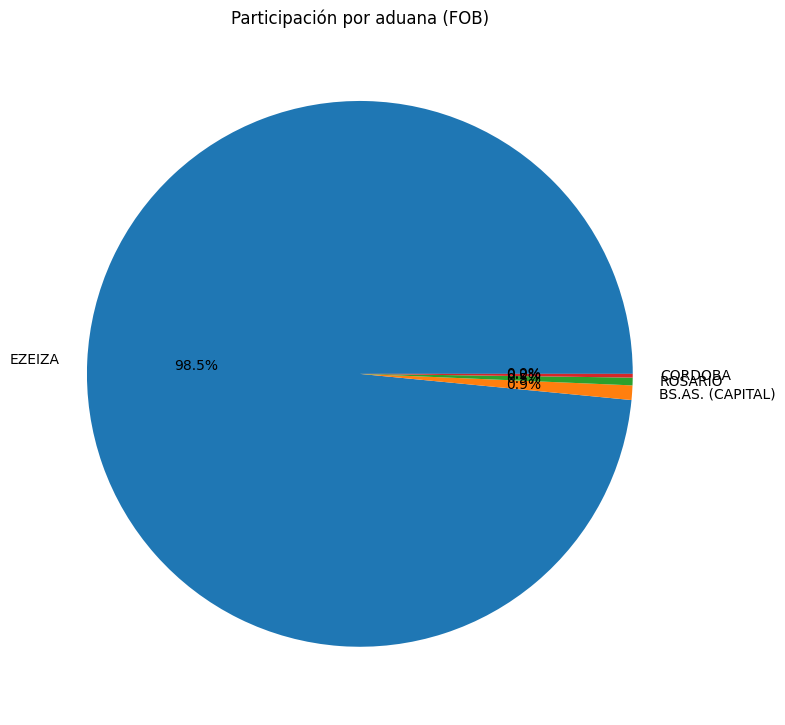

In [45]:
# Elegir solo las top 10 aduanas (y agrupar el resto como "Otras")
top_aduanas = aduana_fob_pct.head(10)
otras = aduana_fob_pct[10:].sum()
top_aduanas['Otras'] = otras

# Graficar
top_aduanas.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Participación por aduana (FOB)', ylabel='')
plt.tight_layout()
plt.show()

**Most imported products,sorted by quantity**

In [11]:
df.groupby('POSICION')['CANT_UNIDAD'].sum().sort_values(ascending=False).head(5).reset_index()

,POSICION,CANT_UNIDAD
0,3926.90,36088328.0
1,8541.29,30834443.0
2,3923.21,11070094.0
3,8533.21,10729515.0
4,4016.93,9476071.0


The most imported product category by quantity corresponds to HS code 3926.90, which refers to "Other articles of plastics." This is a broad and often-used classification within the customs system, typically applied to plastic items that don't fall under more specific codes. It commonly includes accessories such as phone cases, watch bands, household plastic goods, and various small plastic parts. The frequent use of this code suggests that a significant portion of courier imports are low-cost, lightweight consumer products that benefit from the simplified import regime.

In [46]:
# we check the average price of those

print(f"The average price is USD {df[df['POSICION'] == '3926.90']['COSTO_UNITARIO'].mean():.2f}")


The average price is USD 16.54


The second most imported product category by quantity is HS code 8541.29, which refers to "Other transistors." This category falls under the broader group of semiconductor devices and typically includes discrete transistors used in electronic circuits. These components are essential in the repair and assembly of various consumer electronics, such as smartphones, computers, and other digital devices. The high volume of imports suggests that many of these items are being sourced through courier shipments by repair shops, tech enthusiasts, or small-scale manufacturers seeking affordable components not readily available in the local market.

In [47]:
# we check the average price of those

print(f"The average price is USD {df[df['POSICION'] == '8541.29']['COSTO_UNITARIO'].mean():.2f}")


The average price is USD 1.53


The third most imported item by quantity falls under HS code 3923.21, which stands for "Sacks and bags, of polymers of ethylene." These are plastic bags made from polyethylene, a widely used material in packaging. This category includes resealable bags, courier sleeves, protective pouches, and similar flexible packaging items. Their popularity in imports likely reflects both commercial use—such as for packaging electronics or small products—and personal imports of affordable bulk packaging. Their low weight and cost make them ideal for courier shipments.

In [48]:
# we check the average price of those

print(f"The average price is USD {df[df['POSICION'] == '3923.21']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 4.99


HS code 8533.21 ranks among the top imported categories and refers to "Fixed resistors with a power handling capacity not exceeding 20 watts." These are essential electronic components used in virtually all modern devices, from smartphones to laptops and power adapters. Their presence among the top imports highlights a strong demand from repair shops, electronics hobbyists, and small-scale manufacturing. Due to their small size and low cost, these resistors are ideally suited for courier shipments under Argentina’s simplified import regime.

In [49]:
# we check the average price of those

print(f"The average price is USD {df[df['POSICION'] == '8533.21']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 2.27


Another top imported item by quantity is HS code 4016.93, which refers to "Gaskets, washers, and other seals of vulcanized rubber (excluding hard rubber)." These components are widely used in automotive parts, home appliances, and electronic devices to prevent leaks, reduce friction, or create tight seals. Their import through courier services suggests high demand among repair services and DIY users who need affordable, precise replacements for damaged or worn-out seals.

In [50]:
# we check the average price of those

print(f"The average price is USD {df[df['POSICION'] == '4016.93']['COSTO_UNITARIO'].mean():.2f}")


The average price is USD 36.99


**Most imported products, sorted by FOB** 

In [17]:
df.groupby('POSICION')['FOB_ENVIOS'].sum().sort_values(ascending=False).head(5).reset_index()

,POSICION,FOB_ENVIOS
0,8517.62,22304937.24
1,8471.30,21326051.81
2,4901.99,9671634.03
3,8473.30,6780794.93
4,3926.90,6019293.91


HS code 8517.62 refers to "Cellular phones for wireless networks." This category includes all types of mobile phones, from budget models to high-end smartphones. Their appearance among the top imported items reflects the growing trend of consumers bypassing local retailers to buy directly from abroad, taking advantage of Argentina’s tax-free courier regime for purchases under USD 400. These imports are often driven by price differences, product availability, or the desire for models not yet released in the local market.

In [51]:
print(f"The average price is USD {df[df['POSICION'] == '8517.62']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 49.02


HS code 8471.30 designates "Portable automatic data processing machines," which includes laptops, notebooks, ultrabooks, and similar devices. These products are often imported under the courier regime by individuals seeking better prices or models unavailable locally. The strong presence of this category among the top imports reflects the importance of technology in personal and professional life, and the growing trend of buying high-value tech items directly from abroad to take advantage of cost savings and broader product options.

In [52]:
print(f"The average price is USD {df[df['POSICION'] == '8471.30']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 333.81


HS code 4901.99 refers to "Printed books and similar printed matter, not elsewhere specified." This catch-all category includes novels, technical manuals, textbooks, and other types of printed reading material. Imports under this code likely reflect purchases by students, professionals, and avid readers seeking specific editions or foreign-language books not readily available in local bookstores. Their lightweight nature and cultural value make them a popular item for courier shipments.

In [53]:
print(f"The average price is USD {df[df['POSICION'] == '4901.99']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 31.06


HS code 8473.30 refers to "Parts and accessories for portable automatic data processing machines." This includes a wide range of laptop components such as batteries, keyboards, screens, RAM modules, and motherboards. These items are commonly imported by repair shops or individuals looking to replace damaged parts at a lower cost. The presence of this category among the top imports highlights the growing market for tech maintenance and device longevity driven by Argentina’s evolving import landscape.

In [54]:
print(f"The average price is USD {df[df['POSICION'] == '8473.30']['COSTO_UNITARIO'].mean():.2f}")

The average price is USD 59.79


**Imports volume trend, grouped by month**

In [23]:
# Agrupar por mes y sumar el valor FOB
mensual_fob = df.groupby('FECHA_MES')['FOB_ENVIOS'].sum().sort_index()

# Mostrar todos los valores por mes
print(mensual_fob)

FECHA_MES
2024-01    12832258.04
2024-02     9622350.33
2024-03    10520981.87
2024-04    12212323.35
2024-05    12787189.42
2024-06    12463872.04
2024-07    13893067.20
2024-08    15502857.09
2024-09    13766179.80
2024-10    18155558.23
2024-11    18613653.56
2024-12    29529008.40
2025-01    35609535.32
2025-02    32280396.62
2025-03    38217076.72
2025-04    41149563.79
Name: FOB_ENVIOS, dtype: float64


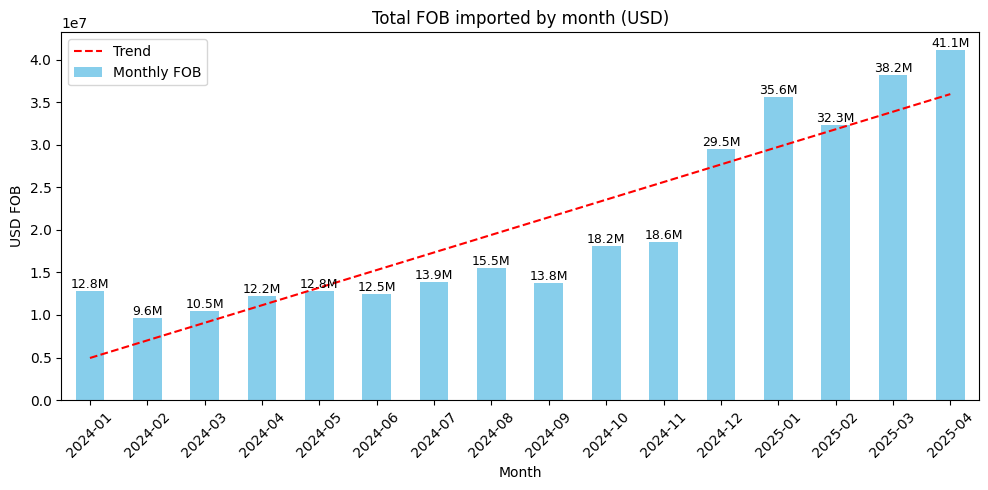

In [59]:
def format_millions(value):
    return f'{value / 1_000_000:.1f}M'

import numpy as np
import matplotlib.pyplot as plt

def format_millions(value):
    return f'{value / 1_000_000:.1f}M'

# Crear figura
fig, ax = plt.subplots(figsize=(10, 5))

# Plotear barras
mensual_fob.plot(kind='bar', ax=ax, color='skyblue', label='Monthly FOB')
plt.ylabel('USD FOB')
plt.xlabel('Month')
plt.title('Total FOB imported by month (USD)')
plt.xticks(rotation=45)

# Etiquetas encima de cada barra
for i, v in enumerate(mensual_fob):
    ax.text(i, v, format_millions(v), ha='center', va='bottom', fontsize=9)

# Línea de tendencia
x = np.arange(len(mensual_fob))
y = mensual_fob.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), linestyle='--', color='red', label='Trend')

# Leyenda y layout
ax.legend()
plt.tight_layout()
plt.savefig('fob_by_month.png', dpi=300, bbox_inches='tight')  # 💾 Save image
plt.show()


**Imports volume quantity, grouped by month (only items in units)**

In [25]:
# Filtrar solo las filas cuya unidad sea 'UNIDAD'
df_unidad = df[df['DESC_TIPO_UNIDAD'].str.strip().str.upper() == 'UNIDAD']

# Agrupar por mes y sumar la cantidad
mensual_unidad = df_unidad.groupby('FECHA_MES')['CANT_UNIDAD'].sum().sort_index()

# Mostrar resultados
print(mensual_unidad)

FECHA_MES
2024-01    14994603.31
2024-02     6952628.40
2024-03    10041904.74
2024-04     9646274.80
2024-05     9918104.03
2024-06     9767436.89
2024-07    20923401.30
2024-08    11978796.00
2024-09    14297224.40
2024-10     8988580.10
2024-11    10056213.10
2024-12    12747455.00
2025-01    46412538.65
2025-02    10930400.06
2025-03    14381550.00
2025-04    23373781.00
Name: CANT_UNIDAD, dtype: float64


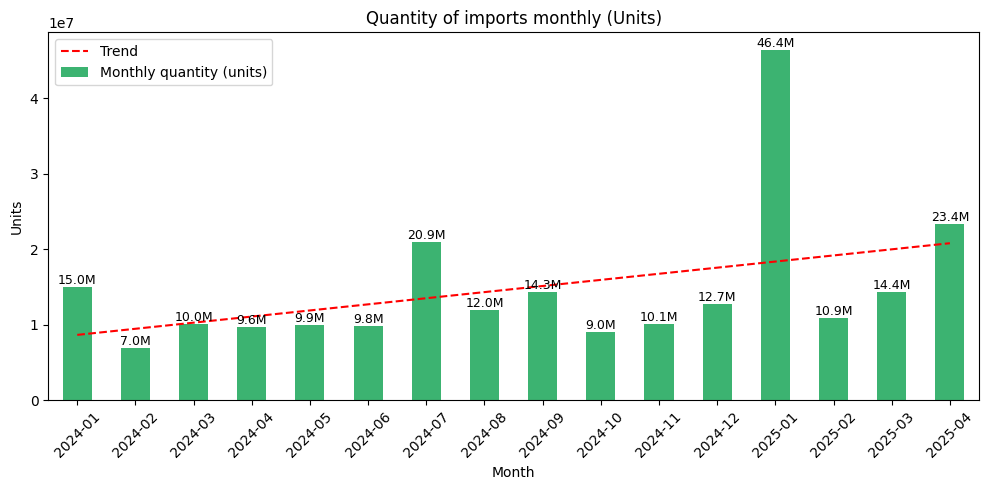

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def format_millions(value):
    return f'{value / 1_000_000:.1f}M'

# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars
mensual_unidad.plot(kind='bar', ax=ax, color='mediumseagreen', label='Monthly quantity (units)')
plt.ylabel('Units')
plt.xlabel('Month')
plt.title('Quantity of imports monthly (Units)')
plt.xticks(rotation=45)

# Add value labels above each bar
for i, v in enumerate(mensual_unidad):
    ax.text(i, v, format_millions(v), ha='center', va='bottom', fontsize=9)

# Add trend line
x = np.arange(len(mensual_unidad))
y = mensual_unidad.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), linestyle='--', color='red', label='Trend')

# Legend and layout
ax.legend()
plt.tight_layout()

# Save the figure
plt.savefig('monthly_quantity_units.png', dpi=300, bbox_inches='tight')

# Show it
plt.show()
